# Import library

In [ ]:
import numpy as np
import pandas as pd

# Basic data types


## Series
One-dimensional labeled array holding data of any type such as integers, strings, Python objects etc.

## DataFrame
Two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

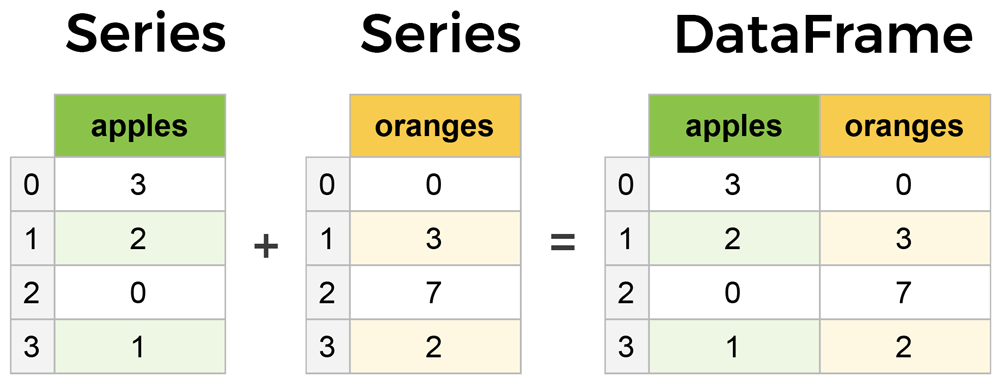

## Series

Create a serie: s = pd.Series(data, index=index)
* data: data can be many different things: a Python dict, an ndarray, a scalar value (like 5), etc.
* index: a list of axis labels. Thus, this separates into a few cases depending on what data is:

### From ndarray

In [ ]:
# If data is an ndarray, index must be the same length as data.
# If no index is passed, one will be created having values [0, ..., len(data) - 1].

# Create series with indexes
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
print(s)

# Show indexes
print(s.index)

# Access
print("ELEMENT", s['a'])

#Create series with no index
pd.Series(np.random.randn(5))

a   -0.857062
b   -2.062683
c   -0.087892
d   -1.084701
e    1.253555
dtype: float64
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
ELEMENT -0.8570622142768


,0
0,0.375995
1,0.776250
2,-0.691626
3,0.074001
4,0.384899


### From dictionary

In [ ]:
d = {"b": 1, "a": 0, "c": 2}
s = pd.Series(d)
print(s)
print(s['a'])

print(s.index)
# If an index is passed, the values in data corresponding to the labels in the index will be pulled out.
# NaN (not a number) is the standard missing data marker used in pandas.
pd.Series(d, index=["b", "c", "d", "a"])

b    1
a    0
c    2
dtype: int64
0
Index(['b', 'a', 'c'], dtype='object')


,0
b,1.0
c,2.0
d,NaN
a,0.0


### From scalar value

In [ ]:
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

,0
a,5.0
b,5.0
c,5.0
d,5.0
e,5.0


## DataFrame
DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

* Dict of 1D ndarrays, lists, dicts, or Series
* 2-D numpy.ndarray
* Structured or record ndarray
* A Series
* Another DataFrame

### From dict of Series or dicts
The resulting index will be the union of the indexes of the various Series. If there are any nested dicts, these will first be converted to Series. If no columns are passed, the columns will be the ordered list of dict keys.



In [ ]:
# If axis labels are not passed, they will be constructed from the input data based on common sense rules.
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}
df = pd.DataFrame(d)
print(df)
print("POSITION ONE")
print(df['one'])

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0
POSITION ONE
a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64


### From dict of ndarrays / lists
All ndarrays must share the same length. If an index is passed, it must also be the same length as the arrays. If no index is passed, the result will be range(n), where n is the array length.

In [ ]:
d = {"one": [1.0, 2.0, 3.0, 4.0],
     "two": [4.0, 3.0, 2.0, 1.0]}
print(pd.DataFrame(d))
print(pd.DataFrame(d, index=["a", "b", "c", "d"]))

   one  two
0  1.0  4.0
1  2.0  3.0
2  3.0  2.0
3  4.0  1.0
   one  two
a  1.0  4.0
b  2.0  3.0
c  3.0  2.0
d  4.0  1.0


### From a list of dicts

In [ ]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
print(pd.DataFrame(data2))
print(pd.DataFrame(data2, index=["first", "second"]))
print(pd.DataFrame(data2, columns=["a", "b"]))

   a   b     c
0  1   2   NaN
1  5  10  20.0
        a   b     c
first   1   2   NaN
second  5  10  20.0
   a   b
0  1   2
1  5  10


### From a dict of tuples

In [ ]:
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

### From structured or record array

In [ ]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "S10")])
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


### From a Series
The result will be a DataFrame with the same index as the input Series, and with one column whose name is the original name of the Series (only if no other column name provided).

In [ ]:
ser = pd.Series(range(3), index=list("abc"), name="ser")
pd.DataFrame(ser)

,ser
a,0
b,1
c,2


### From a list of namedtuples
The field names of the first namedtuple in the list determine the columns of the DataFrame. The remaining namedtuples (or tuples) are simply unpacked and their values are fed into the rows of the DataFrame. If any of those tuples is shorter than the first namedtuple then the later columns in the corresponding row are marked as missing values. If any are longer than the first namedtuple, a ValueError is raised.

In [ ]:
from collections import namedtuple

Point = namedtuple("Point", "x y")
print(pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)]))

Point3D = namedtuple("Point3D", "x y z")
print(pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)]))


   x  y
0  0  0
1  0  3
2  2  3
   x  y    z
0  0  0  0.0
1  0  3  5.0
2  2  3  NaN


# Viewing data

In [ ]:
# Use DataFrame.head() and DataFrame.tail() to view the top and bottom rows of the frame respectively
dates = pd.date_range("20130101", periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
print(df.head())
print(df.tail(3))

print()

# Display the DataFrame.index or DataFrame.columns
print("INDEX; ******** \n", df.index)
print("COLUMNAS; ******** \n", df.columns)

print()

# describe() shows a quick statistic summary of your data:
print(df.describe())

print("DF ORIGINAL **********\n", df)

# DataFrame.sort_index() sorts by an axis:
print(df.sort_index(axis=1, ascending=False))

print()

# DataFrame.sort_values() sorts by values
print(df.sort_values(by="B"))



                   A         B         C         D
2013-01-01  0.030737  1.655573  1.096597 -1.527061
2013-01-02 -1.329281 -0.919223  0.254177 -1.003888
2013-01-03 -0.767618 -0.670494 -0.715079  0.283474
2013-01-04 -1.967459  1.892023  0.390081  0.866838
2013-01-05 -0.296618 -0.343795  1.486705  0.490664
                   A         B         C         D
2013-01-04 -1.967459  1.892023  0.390081  0.866838
2013-01-05 -0.296618 -0.343795  1.486705  0.490664
2013-01-06  0.083323  1.187708 -1.167979 -0.867384

INDEX; ******** 
 DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
COLUMNAS; ******** 
 Index(['A', 'B', 'C', 'D'], dtype='object')

              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean  -0.707819  0.466965  0.224084 -0.292893
std    0.814487  1.251856  1.020178  0.964351
min   -1.967459 -0.919223 -1.167979 -1.527061
25%   -1.188

## Getting items

In [ ]:
# For a DataFrame, passing a single label selects a columns and yields a Series equivalent to df.A
print("DF ORIGINAL **********\n", df)

print(df["A"])

# For a DataFrame, passing a slice : selects matching rows
print("\n", df[0:3])


# By label
print("\n", df.loc[dates[0]])
print("\n", df.loc[:, ["A", "B"]])
print("\n", df.loc["20130102":"20130104", ["A", "B"]])
print("\n", df.loc[dates[0], "A"])
print("\n", df.at[dates[0], "A"])

DF ORIGINAL **********
                    A         B         C         D
2013-01-01  0.030737  1.655573  1.096597 -1.527061
2013-01-02 -1.329281 -0.919223  0.254177 -1.003888
2013-01-03 -0.767618 -0.670494 -0.715079  0.283474
2013-01-04 -1.967459  1.892023  0.390081  0.866838
2013-01-05 -0.296618 -0.343795  1.486705  0.490664
2013-01-06  0.083323  1.187708 -1.167979 -0.867384
2013-01-01    0.030737
2013-01-02   -1.329281
2013-01-03   -0.767618
2013-01-04   -1.967459
2013-01-05   -0.296618
2013-01-06    0.083323
Freq: D, Name: A, dtype: float64

                    A         B         C         D
2013-01-01  0.030737  1.655573  1.096597 -1.527061
2013-01-02 -1.329281 -0.919223  0.254177 -1.003888
2013-01-03 -0.767618 -0.670494 -0.715079  0.283474

 A    0.030737
B    1.655573
C    1.096597
D   -1.527061
Name: 2013-01-01 00:00:00, dtype: float64

                    A         B
2013-01-01  0.030737  1.655573
2013-01-02 -1.329281 -0.919223
2013-01-03 -0.767618 -0.670494
2013-01-04 -1.96

# Reading

https://www.kaggle.com/

## Explore data

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=dd274782c76210ae1f7060e86dc65b6f366b8a66282e97e6e7e9935c24818b9c
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
df = pd.read_csv("/content/penguins_size.csv")
print("HEAD:\n", df.head())
print("\nHOW MANY NULLS PER COLUMN?:\n", df.isnull().sum())
print("\nHOW MANY ROWS:", df.size)

HEAD:
   species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  

HOW MANY NULLS PER COLUMN?:
 species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

HOW MANY ROWS: 2408


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 53.71it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Missing values

## Drop NaN's

In [ ]:
# Detect null data
print("\nHOW MANY NULLS PER COLUMN?:\n",df.isnull().sum())
print("\nHOW MANY ROWS?:\n",df.size)


HOW MANY NULLS PER COLUMN?:
 species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

HOW MANY ROWS?:
 2408


In [ ]:
df_no_nan = df.dropna()
print("\nHOW MANY NULLS PER COLUMN?:\n",df_no_nan.isnull().sum())
print("\nHOW MANY ROWS?:\n",df_no_nan.size)


HOW MANY NULLS PER COLUMN?:
 species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

HOW MANY ROWS?:
 2338


## Fill NaN's
* **ffill**: Fill values by propagating the last valid observation to next valid.
* **bfill**: Fill values by using the next valid observation to fill the gap.
* **interpolate**: Fill NaN values using interpolation.
* **reindex**: Conform object to new index.
* **asfreq**: Convert TimeSeries to specified frequency.

In [ ]:
col_mean_culmen_length_mm = df['culmen_length_mm'].mean()
col_mean_culmen_depth_mm = df['culmen_depth_mm'].mean()
col_mean_flipper_length_mm = df['flipper_length_mm'].mean()
col_mean_body_mass_g = df['body_mass_g'].mean()

df_mean = df

df_mean['culmen_length_mm']=df_mean['culmen_length_mm'].fillna(col_mean_culmen_length_mm)
df_mean['culmen_depth_mm']=df_mean['culmen_depth_mm'].fillna(col_mean_culmen_depth_mm)
df_mean['flipper_length_mm']=df_mean['flipper_length_mm'].fillna(col_mean_flipper_length_mm)
df_mean['body_mass_g']=df_mean['body_mass_g'].fillna(col_mean_body_mass_g)

df_mean = df_mean.dropna()

print("\nHOW MANY NULLS PER COLUMN?:\n",df_mean.isnull().sum())
print("\nHOW MANY ROWS?:\n",df_mean.size)


HOW MANY NULLS PER COLUMN?:
 species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

HOW MANY ROWS?:
 2338
